Lane Detection
===
Execution of Lane Detection via Image Pre-processing and Information Extraction

In [27]:
import cv2
import os
import numpy as np
from copy import deepcopy

import sys
sys.path.append('../')

import general_utils
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 6]

perspective_correction = None
perspective_correction_inv = None
left_fit_avg = None
right_fit_avg = None
MIN_DETECTIONS = 8
MAX_DETECTIONS = 10

def mathplot_display_concatenated(name, images, alignment="h"):
    if alignment == "v":
        images = cv2.vconcat(images) if isinstance(images, list) else images
    else:
        images = cv2.hconcat(images) if isinstance(images, list) else images
    
    plt.title(name)
    plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    plt.figure()

Image Import
===
3 files in total (sd1, sd2, sd3)

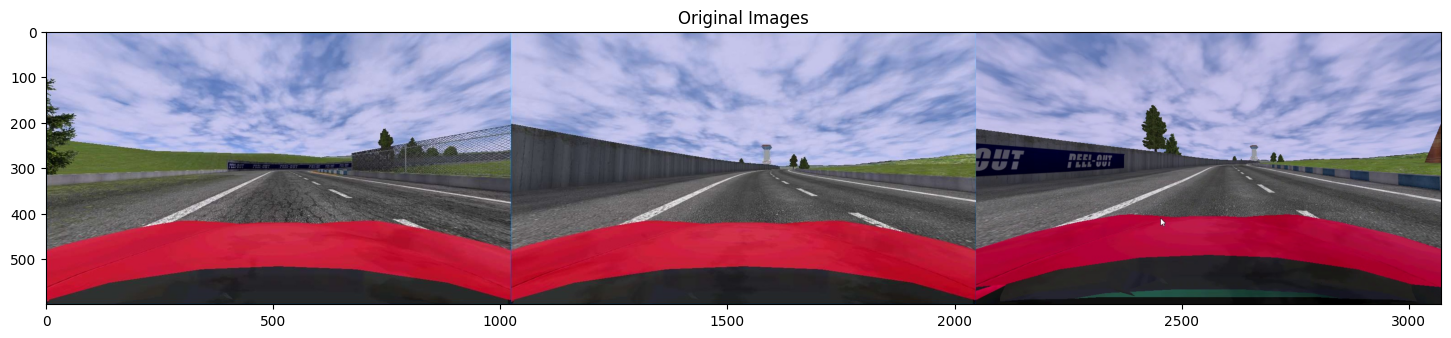

<Figure size 1800x600 with 0 Axes>

In [28]:
original_images = []
file_paths = ["road-images/sd1.jpg","road-images/sd2.jpg","road-images/sd3.jpg"]
for file_path in file_paths:
    original_images.append(cv2.imread(file_path))

print_ = mathplot_display_concatenated("Original Images", original_images, "h")

Perspective Warping
===
Perspective Correction for "Birds Eye View"


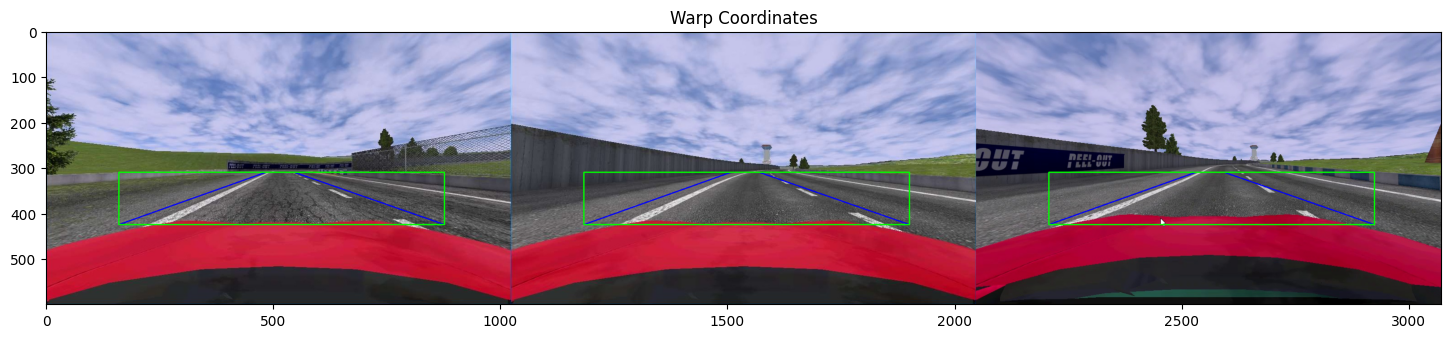

<Figure size 1800x600 with 0 Axes>

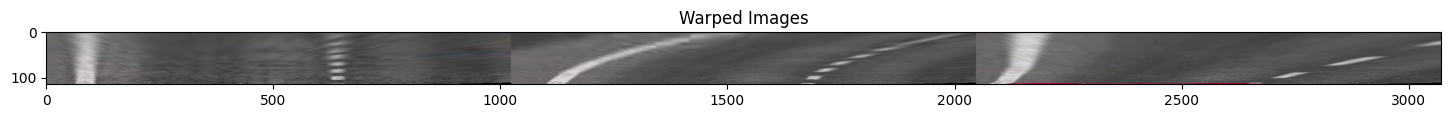

<Figure size 1800x600 with 0 Axes>

In [30]:
original_images_copy = [original_image.copy() for original_image in original_images]
warp_coord = [(160, 425), (484, 310), (546, 310), (877, 425)]
destination_size = (1024,600)

warped_images = [original_image for original_image in original_images]

###########################################
# compute perspective
###########################################
def compute_perspective(warp_coord):
    global perspective_correction, perspective_correction_inv

    max_x = max([coord[0] for coord in warp_coord])
    min_x = min([coord[0] for coord in warp_coord])
    max_y = max([coord[1] for coord in warp_coord])
    min_y = min([coord[1] for coord in warp_coord])
    
    width = max_x - min_x
    height = max_y - min_y

    src = np.float32(warp_coord)
    dst = np.float32([(0, height), (0, 0), (width, 0), (width, height)])

    perspective_correction = cv2.getPerspectiveTransform(src, dst)
    perspective_correction_inv = cv2.getPerspectiveTransform(dst, src)

def warp_images(images, warp_coord, destination_size):
    draw_images = [image.copy() for image in images]

    max_x = max([coord[0] for coord in warp_coord])
    min_x = min([coord[0] for coord in warp_coord])
    max_y = max([coord[1] for coord in warp_coord])
    min_y = min([coord[1] for coord in warp_coord])
    
    ###########################################
    # draw warp coordinates on image and show
    ###########################################
    for i in range(len(draw_images)):
        # draw line for warp coordinates
        cv2.line(draw_images[i], warp_coord[0], warp_coord[1], (255,0,0), 2)
        cv2.line(draw_images[i], warp_coord[1], warp_coord[2], (255,0,0), 2)
        cv2.line(draw_images[i], warp_coord[2], warp_coord[3], (255,0,0), 2)
        cv2.line(draw_images[i], warp_coord[3], warp_coord[0], (255,0,0), 2)

        # draw rectangle for destination size
        cv2.rectangle(draw_images[i], (min_x, min_y), (max_x, max_y), (0,255,0), 2)
  
    mathplot_display_concatenated("Warp Coordinates", draw_images, "h")

    for i in range(len(images)):
        warped_images[i] = cv2.warpPerspective(images[i], perspective_correction, (destination_size[0], max_y-min_y), flags=cv2.INTER_LINEAR)

compute_perspective(warp_coord)
warp_images(original_images_copy, warp_coord, destination_size)
plt.figure()
mathplot_display_concatenated("Warped Images", warped_images, "h")

